# Linear Regression Example

Simple linear regression is a basic data analysis technique which tries to fit data with a single order polynomial. The fitting is done by trying to minimize the overall sum of the squares of the residuals. 

I will apply a simple linear regression to a data set which contains sale prices for houses in King County, Washington sold from May 2014 to May 2015.

https://www.kaggle.com/harlfoxem/housesalesprediction/downloads/kc_house_data.csv.zip

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 

from scipy import stats, linalg


In [2]:
# load the data and select the columns we want to examine

data = pd.read_csv("./kc_house_data.csv", parse_dates = ['date'])
data = data[ ['sqft_living', 'price'] ]
data.describe()

,sqft_living,price
count,21613.000000,2.161300e+04
mean,2079.899736,5.400881e+05
std,918.440897,3.671272e+05
min,290.000000,7.500000e+04
25%,1427.000000,3.219500e+05
50%,1910.000000,4.500000e+05
75%,2550.000000,6.450000e+05
max,13540.000000,7.700000e+06


## Examining Outliers in Price

before we perform the regression it will be usefull to see if there are any outliers that may skew our fit, and if so remove them 

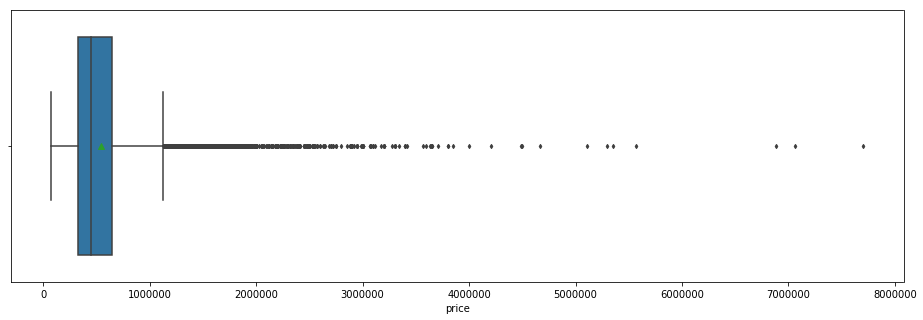

In [3]:
# box and whisker diagram to examine price 
fig, ax = plt.subplots(figsize=(16,5))
sns.boxplot(x = 'price', data = data, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

#### There is a long tail on the data and we can see sparse outlier points. The whiskers of our plot are aslo skewed in that direction, so it will warrant removing them. We will create a function that removes outliers beyond n standard deviations

In [4]:
# Create a function to un-skew data
def elim_outliers( dataset, column, n):
    ''' removes all rows from a dataset where vales in column exceed n standard deviations from norm'''    
    # initialize constants
    data_mean = column.mean() 
    data_std = column.std()
    data_med = column.median()
    
    # determin critical threshold value 
    crit_val = data_mean + data_std * n  
            
    return dataset[abs(column) <= crit_val]

# run this filter on prices 
clean_data = elim_outliers(data, data['price'], 5)

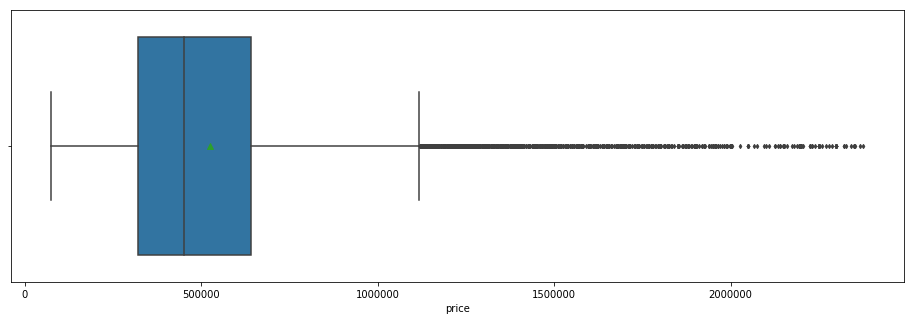

In [5]:
# box and whisker diagram to examine outliers 

fig, ax = plt.subplots(figsize=(16,5))
sns.boxplot(x = 'price', data = clean_data, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

In [6]:
print('data points removed: {}'.format(len(data) - len(clean_data)) ) 
p = round( ((len(data) - len(clean_data))/len(data)*100), 2)
print( 'Percentage of data removed: {}%'.format(p ) )


data points removed: 126
Percentage of data removed: 0.58%


We have substantially cleaned our data by removing outliers beyond 5 standard deviations from the mean, and only removed ~ 0.6% of the data

## Visualizing the Cleaned Data: 



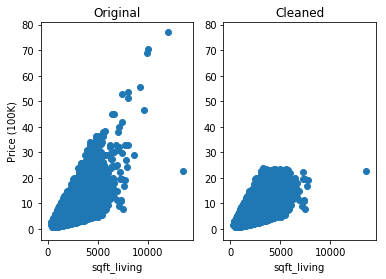

In [7]:

# Plot cleaned: 
fig = plt.figure()

sub1 = fig.add_subplot(1, 2, 1)
sub1.scatter( data['sqft_living'],data["price"]/100000)
sub1.set_xlabel('sqft_living')
sub1.set_ylabel("Price (100K)")
sub1.set_title('Original')


# Plot uncleaned
sub2 = fig.add_subplot(1, 2, 2, sharex= sub1, sharey= sub1)
sub2.scatter( clean_data['sqft_living'],clean_data["price"]/100000)
sub2.set_xlabel('sqft_living')
sub2.set_title("Cleaned" )


#fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)


fig.subplots_adjust(hspace=500)

plt.show()

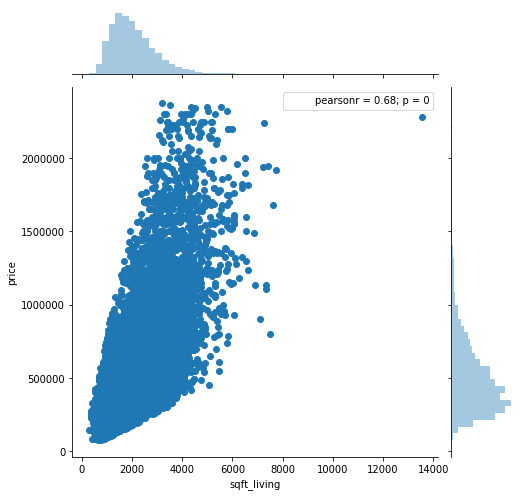

In [8]:
# A joint plot is used to visualize the bivariate distribution
sns.jointplot(x="sqft_living", y="price", data=clean_data, kind = 'scatter', size = 7)
plt.show()



* plotting shows that there is a correlation. The data is skewed but appears (by-eye) normally distributed. 
* The Pearson Correlation coeficient of .69 (with p value of 0) shows there is a strong possitive correlation



# Applying Linear Regression 

In [9]:
from sklearn import linear_model, metrics

# Create the model algorithm 
alg = linear_model.LinearRegression()

x = clean_data['sqft_living'].values.reshape(-1,1)
y = clean_data['price'].values.reshape(-1,1)

alg.fit(x, y )

/Users/holmium4/.virtualenvs/datascience/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print("First order polynomial fit:")
print(" y = {} * X + {}".format(alg.coef_[0][0], alg.intercept_[0]) )


First order polynomial fit:
 y = 236.77303817673527 * X + 37234.906484832696


In [11]:
# Calculate an R^2 value:

r2 = metrics.r2_score(y, alg.predict(x))
print('The fit has an R^2 score of {}'.format(r2)) 
print('i.e {}% of the variace comes from the linearity'.format(round(r2*100,2)) )  


The fit has an R^2 score of 0.46793721455376913
i.e 46.79% of the variace comes from the linearity


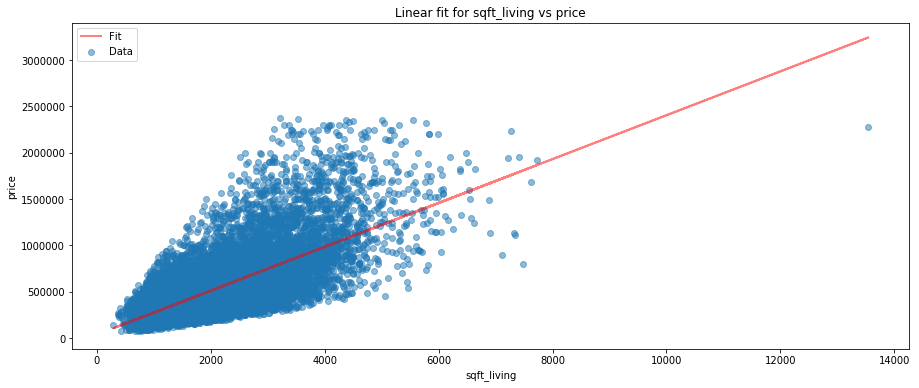

In [12]:
# Plotting our fit 

plt.figure(figsize=(15,6))

plt.plot(x, alg.predict(x), color='red', alpha = 0.5,
         linewidth=2, label='Fit')

plt.scatter( clean_data['sqft_living'], clean_data['price'], alpha=0.5, label='Data' )



plt.title("Linear fit for sqft_living vs price")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.legend()

plt.show()

## Examining risiduals 

To avaluate how appropriate the fit is it is important to examine residuals as well as the R^2 value

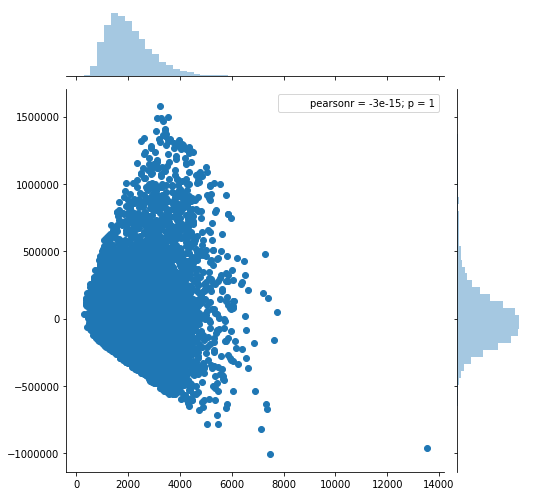

In [13]:
# Viewing the residuals 

residuals = y - alg.predict(x)

# A joint plot is used to visualize the bivariate distribution
plt.show()
sns.jointplot(x=x, y=residuals, kind = 'scatter', size = 7)

plt.show()



* The distribution of points around 0 appears to be normally distributed via the histogram on the right, and therefore a linear regression seems validated. 

* If needed we could verify this by a chi-squared test. 